1. Import the "Retail_Sales_Data.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for aggregating sales data, such as region, sales
amount, and product category.
4. Group the sales data by region and calculate the total sales amount for each region.
5. Create bar plots or pie charts to visualize the sales distribution by region.
6. Identify the top-performing regions based on the highest sales amount.
7. Group the sales data by region and product category to calculate the total sales
amount for each combination.
8. Create stacked bar plots or grouped bar plots to compare the sales amounts across
different regions and product categories.

# 1.Import the "Retail_Sales_Data.csv" dataset.


In [1]:
import pandas as pd
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# 2.Explore the dataset to understand its structure and content.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56030 entries, 0 to 56029
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      56030 non-null  object 
 1   customer_id     56030 non-null  object 
 2   gender          56030 non-null  object 
 3   age             56030 non-null  int64  
 4   category        56030 non-null  object 
 5   quantity        56030 non-null  int64  
 6   price           56029 non-null  float64
 7   payment_method  56029 non-null  object 
 8   invoice_date    56029 non-null  object 
 9   shopping_mall   56029 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.3+ MB


In [3]:
df.describe()

,age,quantity,price
count,56030.000000,56030.000000,56029.000000
mean,43.439979,3.005765,687.840635
std,15.008412,1.414675,939.848106
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [4]:
df.shape

(56030, 10)

In [5]:
df.isna().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,1
payment_method,1
invoice_date,1
shopping_mall,1


# 3.Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.

In [9]:
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


# 4.Group the sales data by region and calculate the total sales amount for each region.

In [10]:
sales = df.groupby('shopping_mall').agg({'price':'sum'})
sales

,price
shopping_mall,
Cevahir AVM,1940437.29
Emaar Square Mall,1943827.32
Forum Istanbul,1848719.12
Istinye Park,3764630.97
Kanyon,7726777.71
Mall of Istanbul,7803829.39
Metrocity,5755758.96
Metropol AVM,3858048.56
Viaport Outlet,1936246.46


# 5.Create bar plots or pie charts to visualize the sales distribution by region.

In [13]:
sales.values.ravel()

array([1940437.29, 1943827.32, 1848719.12, 3764630.97, 7726777.71,
       7803829.39, 5755758.96, 3858048.56, 1936246.46, 1960747.14])

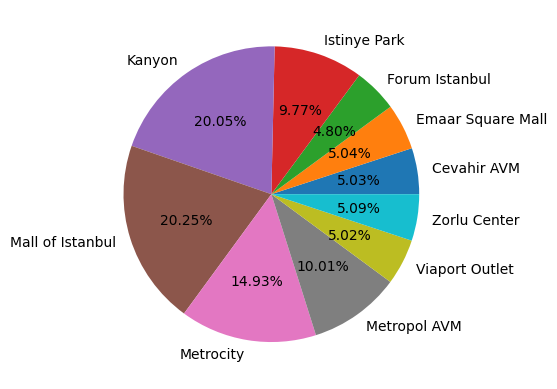

In [14]:
import matplotlib.pyplot as plt
plt.pie(sales.values.ravel(),
        labels=sales.index,
        autopct='%1.2f%%');

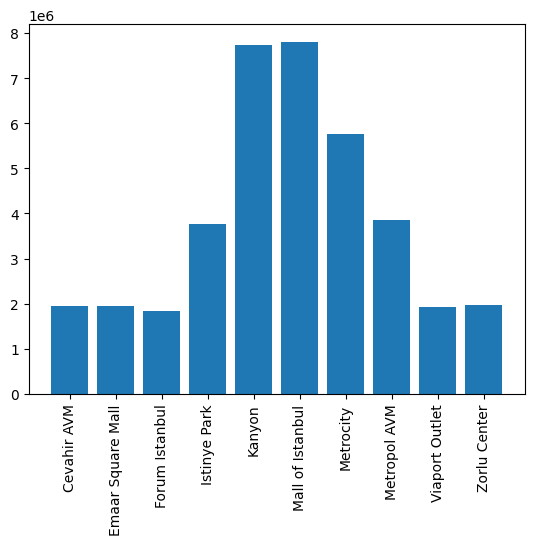

In [16]:
# plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.bar(sales.index,sales.values.ravel());

# 6.Identify the top-performing regions based on the highest sales amount.

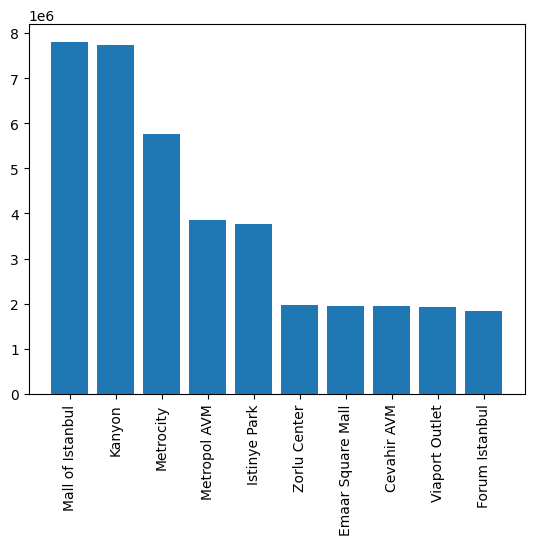

In [21]:
# plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sales_sorted = sales.sort_values('price',ascending = False)
plt.bar(sales_sorted.index,sales_sorted.values.ravel());

# 7.Group the sales data by region and product category to calculate the total sales amount for each combination.

In [ ]:
df.groupby(['shopping_mall','category']).agg({'price':'sum'})

price
shopping_mall category                   
Cevahir AVM   Books              11998.80
              Clothing         1554414.40
              Cosmetics          88394.84
              Food & Beverage    11992.39
              Shoes             884050.41
...                                   ...
Zorlu Center  Food & Beverage    11589.68
              Shoes             953670.13
              Souvenir            8398.68
              Technology        803250.00
              Toys               54691.84

[80 rows x 1 columns]

# 8.Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

In [ ]:
pivot_table = df.pivot_table(index='shopping_mall',columns='category',values='price',aggfunc='sum')
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,11998.80,1554414.40,88394.84,11992.39,884050.41,8304.84,819000.0,55516.16
Emaar Square Mall,11059.50,1511803.04,92379.52,11030.07,871446.84,8515.98,834750.0,49423.36
Forum Istanbul,11453.40,1572119.12,95225.72,10836.56,875648.03,9090.75,706650.0,55050.24
Istinye Park,20725.20,3050313.20,178741.36,23419.94,1806511.70,18369.18,1509900.0,109096.96
Kanyon,44980.35,6155541.04,372242.30,45474.85,3640031.05,35483.25,3202500.0,214502.40
Mall of Istanbul,46949.85,6245565.04,373787.38,46431.94,3668239.04,34263.33,3220350.0,216151.04
Metrocity,34405.65,4719958.32,272422.00,35375.72,2610139.33,25770.81,2386650.0,165258.24
Metropol AVM,22240.20,3166444.16,185775.54,23984.78,1942750.29,18603.78,1465800.0,112394.24
Viaport Outlet,10908.00,1530708.08,92664.14,11432.78,882850.07,7636.23,823200.0,54620.16


<Axes: xlabel='shopping_mall'>

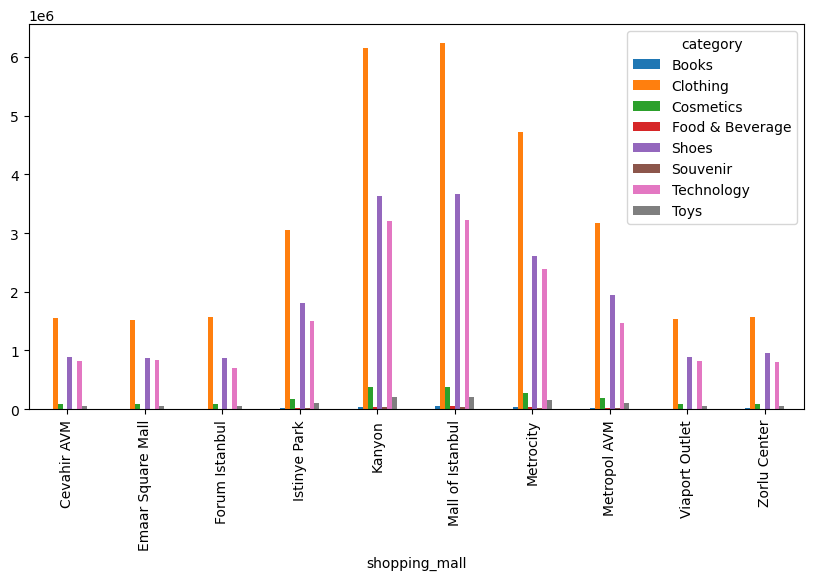

In [ ]:
pivot_table.plot(kind='bar',figsize=(10,5))